# Pymaceuticals Inc.
---

### Analysis
* With the total of 248 cancer affected mouses, a variety of drugs were used to treat these mouses. Out of these drugs, after detailed analysis and monitoring over the course of time, four of the drugs which seems to have worked better in treating these mouses were analyzed further and compared. 
* Capomulin is the only treatment that reduces tumor volume over time indicating it can potentially be the key to curing cancer. 
* With a correlation coefficient of 0.84 between mouse weight and average tumor volume, it indicates that it has a strong positive correlation. 
* With the scatter plot and linear regression plot, we can observe that both the variabels, average weight and average Tumor volume have linear relationship. When the mouse weight increases the average tumor volume also increases.
* Next to Campomulin, Ramicane is equally an efficient drug is curing cancer. 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
%matplotlib notebook
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Pymaceuticals_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
#Pymaceuticals_df.head()

In [5]:
#mouse_metadata

In [6]:
#study_results

In [7]:
# Checking the number of mice.
Pymaceuticals_df["Mouse ID"].nunique()


249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Pymaceuticals_df[Pymaceuticals_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]["Mouse ID"].unique()

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
Pymaceuticals_df.loc[Pymaceuticals_df["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaner_Pymaceuticals_df=Pymaceuticals_df.loc[Pymaceuticals_df["Mouse ID"]!= "g989"]
cleaner_Pymaceuticals_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
# Checking the number of mice in the clean DataFrame.
Uniquemice=cleaner_Pymaceuticals_df["Mouse ID"].nunique()
Uniquemice

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [13]:
# Calculating the mean properties of each drug regimen
Mean_Tumor_Volume = cleaner_Pymaceuticals_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
#Mean_Tumor_Volume

In [14]:
# Calculating the median properties of each drug regimen
Median_Tumor_Volume = cleaner_Pymaceuticals_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
#Median_Tumor_Volume

In [15]:
# Calculating the  variance properties of each drug regimen
Tumor_Volume_Variance = cleaner_Pymaceuticals_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
#Tumor_Volume_Variance

In [16]:
# Calculating the standard deviation properties of each drug regimen
Tumor_Volume_StdDev = cleaner_Pymaceuticals_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
#Tumor_Volume_StdDev

In [17]:
# Calculating the SEM properties of each drug regimen
Tumor_Volume_StdErr = cleaner_Pymaceuticals_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
#Tumor_Volume_StdErr

In [18]:
# Assembling the above resulting series into a single summary dataframe.
Summary_Statistics = pd.DataFrame({ "Mean Tumor Volume": Mean_Tumor_Volume,
                               "Median Tumor Volume": Median_Tumor_Volume ,
                               "Tumor Volume Variance": Tumor_Volume_Variance,
                               "Tumor Volume Std. Dev.":Tumor_Volume_StdDev, 
                               "Tumor Volume Std. Err.":Tumor_Volume_StdErr                              
                             })
Summary_Statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
Average_Summary =  cleaner_Pymaceuticals_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
Average_Summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [21]:
micecounts = cleaner_Pymaceuticals_df["Drug Regimen"].value_counts()
#micecounts

## Bar Charts on Mice counts

### Bar Chart with Pandas

In [22]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
%matplotlib inline

Text(0.5, 1.0, 'Number of Mice Tested per Treatment')

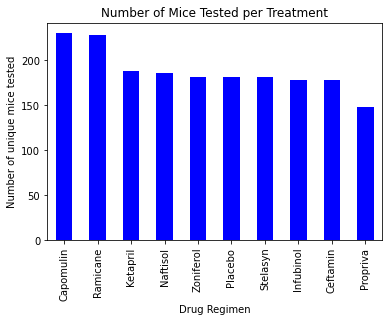

In [23]:
plot_pandas= micecounts.plot(kind = "bar", color = 'b')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of unique mice tested')
plt.title("Number of Mice Tested per Treatment")


### Bar Chart with pyplot

In [24]:
#Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.

In [25]:
drugs = micecounts.index.values
micenumbers = micecounts.values

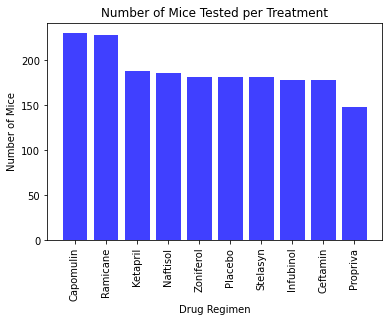

In [26]:
x_axis = np.arange(0,len(drugs))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.bar(x_axis, micenumbers, facecolor="blue", alpha=0.75, align="center")
plt.xticks(tick_locations, drugs, rotation = "vertical")
plt.show()
    
    

## Pie Charts on mice Gender

### Pie Plot with Pandas

In [25]:
micegender =  cleaner_Pymaceuticals_df["Sex"].value_counts()
micegender

Male      958
Female    922
Name: Sex, dtype: int64

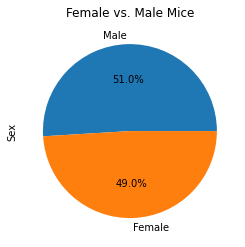

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
micegender.plot(kind='pie', y='Sex', startangle = 360, autopct ='%1.1f%%' )
plt.title("Female vs. Male Mice")
plt.show()


### Pie Plot with pyplot

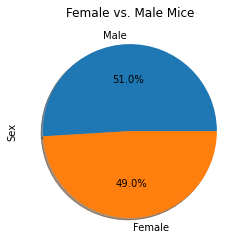

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Male', 'Female'
sizes = [958, 922]
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,autopct="%1.1f%%", shadow=True, startangle=360)
plt.title("Female vs. Male Mice")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_table = cleaner_Pymaceuticals_df.loc[cleaner_Pymaceuticals_df["Drug Regimen"] == "Capomulin", :]
Ramicane_table = cleaner_Pymaceuticals_df.loc[cleaner_Pymaceuticals_df["Drug Regimen"] == "Ramicane", :]
Infubinol_table = cleaner_Pymaceuticals_df.loc[cleaner_Pymaceuticals_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_table = cleaner_Pymaceuticals_df.loc[cleaner_Pymaceuticals_df["Drug Regimen"] == "Ceftamin", :]

In [29]:
# Start by getting the last (greatest) timepoint for each mouse

#### 1. Campomulin Drug

In [30]:
#Finding lasttimepoint for Campomulin drug
LastTimepoint_Campomulin = Capomulin_table.groupby("Mouse ID")["Timepoint"].max()
#Merging lastimepoint_Campomulin with the cleaner_Pymaceuticals_df
merged_campomulin = pd.merge( LastTimepoint_Campomulin,cleaner_Pymaceuticals_df,on=("Mouse ID","Timepoint"), how= "left")

#### 2. Ramicane Drug

In [31]:
#Finding lasttimepoint for Ramicane drug
Lasttimepoint_Ramicane = Ramicane_table.groupby("Mouse ID")["Timepoint"].max()
#Merging lastimepoint_Ramicane with the cleaner_Pymaceuticals_df
merged_Ramicane = pd.merge(Lasttimepoint_Ramicane,cleaner_Pymaceuticals_df,on=("Mouse ID","Timepoint"), how= "left")

#### 3. Infubinol Drug

In [32]:
#Finding lasttimepoint for Infubinol drug
Lasttimepoint_Infubinol = Infubinol_table.groupby("Mouse ID")["Timepoint"].max()
#Merging lastimepoint_Infubinol with the cleaner_Pymaceuticals_df
merged_Infubinol = pd.merge(Lasttimepoint_Infubinol,cleaner_Pymaceuticals_df,on=("Mouse ID","Timepoint"), how= "left")

#### 4.Ceftamin Drug

In [33]:
#Finding lasttimepoint for Ceftamin drug
Lasttimepoint_Ceftamin = Ceftamin_table.groupby("Mouse ID")["Timepoint"].max()
#Merging lastimepoint_Ceftamin with the cleaner_Pymaceuticals_df
merged_Ceftamin = pd.merge(Lasttimepoint_Ceftamin,cleaner_Pymaceuticals_df,on=("Mouse ID","Timepoint"), how= "left")

#### Concatinating all four drug tables that I got above

In [34]:
#Concatenating the drug tables of above four drugs into one
finalall4drugs = pd.concat([merged_campomulin,merged_Ramicane, merged_Infubinol,merged_Ceftamin],ignore_index=True)
#finalall4drugs

####  Finding the Quartiles, Median and Outliers for each drug

In [35]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

treatment = 0 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    finalvolumeforeachdrug = finalall4drugs.loc[finalall4drugs["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_vol_list.append(finalvolumeforeachdrug)
    
    # Determine outliers using upper and lower bounds for each drug and print the same 
    quartiles = finalvolumeforeachdrug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    if treatment == 0:
        print(f"The lower quartile of {drug} is: {round(lowerq, 2)}")
        print(f"The upper quartile of {drug} is: {round(upperq, 2)}")
        print(f"The interquartile range of {drug} is: {round(iqr, 2)}")
        print(f"The median of {drug} drug is: {round(quartiles[0.5], 2)} ")

        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)
        print(f"Values below {round(lower_bound, 2)} could be outliers.")
        print(f"Values above {round(upper_bound, 2)} could be outliers.")
        print(f"................................................")  
        
    
treatment = treatment + 1

The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The median of Capomulin drug is: 38.13 
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.
................................................
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The median of Ramicane drug is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
................................................
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The median of Infubinol drug is: 60.17 
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.
................................................
The lower quartile of Ceftamin is: 48.72
The upper quartile of Ceftamin is: 64.3
The interquartile range of Ceftamin is:

In [36]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

treatment = 0 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    finalvolumeforeachdrug = finalall4drugs.loc[finalall4drugs["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_vol_list.append(finalvolumeforeachdrug)
    
    # Determine outliers using upper and lower bounds for each drug and print the same 
    quartiles = finalvolumeforeachdrug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    if treatment == 0:
        print(f"The lower quartile of {drug} is: {round(lowerq, 2)}")
        print(f"The upper quartile of {drug} is: {round(upperq, 2)}")
        print(f"The interquartile range of {drug} is: {round(iqr, 2)}")
        print(f"The median of {drug} drug is: {round(quartiles[0.5], 2)} ")

        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)
        print(f"Values below {round(lower_bound, 2)} could be outliers.")
        print(f"Values above {round(upper_bound, 2)} could be outliers.")
        print(f"................................................")  
    
treatment = treatment + 1

The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The median of Capomulin drug is: 38.13 
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.
................................................
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The median of Ramicane drug is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
................................................
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The median of Infubinol drug is: 60.17 
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.
................................................
The lower quartile of Ceftamin is: 48.72
The upper quartile of Ceftamin is: 64.3
The interquartile range of Ceftamin is:

### Finding potential ouliers for each of the above four drugs

In [347]:
outlier_Campomulin = merged_campomulin.loc[(merged_campomulin['Tumor Volume (mm3)'] < 20.7 ) | (merged_campomulin['Tumor Volume (mm3)'] > 51.83 )]
Campomulinoutlier = outlier_Campomulin["Tumor Volume (mm3)"].dropna()
outlier_Campomulin


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [348]:
Campomulinoutlier

Series([], Name: Tumor Volume (mm3), dtype: float64)

In [345]:
outlier_Ramicane = merged_Ramicane.loc[(finalall4drugs['Tumor Volume (mm3)'] < 17.91) | (merged_Ramicane['Tumor Volume (mm3)'] > 54.31)]
Ramicaneoutlier = outlier_Ramicane["Tumor Volume (mm3)"].dropna()
outlier_Ramicane


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [346]:
Ramicaneoutlier

Series([], Name: Tumor Volume (mm3), dtype: float64)

In [343]:
outlier_Infubinol = merged_Infubinol.loc[(merged_Infubinol['Tumor Volume (mm3)'] < 36.83) | (merged_Infubinol['Tumor Volume (mm3)'] > 82.74 )]
Infubinoloutlier = outlier_Infubinol["Tumor Volume (mm3)"].dropna()
outlier_Infubinol


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
5,c326,5,36.321346,0,Infubinol,Female,18,25


In [344]:
Infubinoloutlier

5    36.321346
Name: Tumor Volume (mm3), dtype: float64

In [342]:
outlier_Ceftamin =merged_Ceftamin.loc[(merged_Ceftamin['Tumor Volume (mm3)'] < 25.36 ) | (merged_Ceftamin['Tumor Volume (mm3)'] > 87.67 )]
Ceftaminoutlier = outlier_Ceftamin["Tumor Volume (mm3)"].dropna()
outlier_Ceftamin


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [341]:
Ceftaminoutlier

Series([], Name: Tumor Volume (mm3), dtype: float64)

In [252]:
print(f"Campomulin's potential ouliers: {Campomulinoutlier}")
print(f"Ramicane's potential ouliers: {Ramicaneoutlier}")
print(f"Infubinol's potential ouliers:{infubinoloutlier}")
print(f"Ceftamin's potential ouliers: {Ceftaminoutlier}")


Campomulin's potential ouliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential ouliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential ouliers:5    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential ouliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


### Boxplots of the Final Tumor Volume of each of four mouses

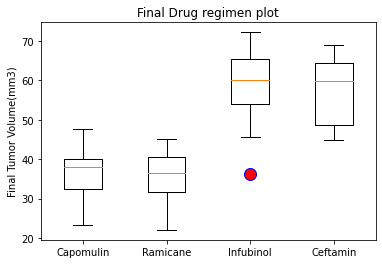

In [147]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [tumor_vol_list[0],tumor_vol_list[1], tumor_vol_list[2], tumor_vol_list[3]]
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
fig1, ax1 = plt.subplots()
ax1.set_title('Final Drug regimen plot')
ax1.set_ylabel('Final Tumor Volume(mm3)')
ax1.boxplot(data,flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                   linestyle='none', markeredgecolor='b'), labels=treatment_list)
plt.show()

## Line and Scatter Plots

In [315]:
#Filtering data from the Campomulin_table dataframe to get the details of Mouse l509
Campomulinonl509 = Capomulin_table.loc[(Capomulin_table["Mouse ID"]== "l509")]
Campomulinonl509

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207289,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


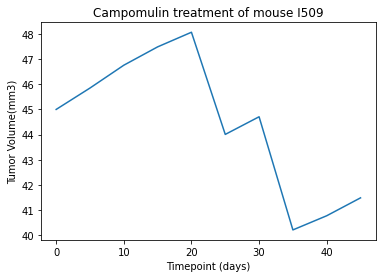

In [309]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume(mm3)")
plt.title("Campomulin treatment of mouse I509")
x_axis = Campomulinonl509["Timepoint"]
y_axis = Campomulinonl509["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.show()

In [37]:
#Filtering data from the Campomulin_table dataframe to get the average tumor volume and Weight (g)
avg_campomulin_vol = Capomulin_table.groupby("Mouse ID").mean()
#avg_campomulin_vol

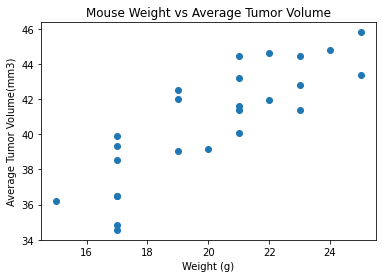

In [312]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
x_axis = avg_campomulin_vol["Weight (g)"]
y_axis = avg_campomulin_vol["Tumor Volume (mm3)"]
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume(mm3)")
plt.title("Mouse Weight vs Average Tumor Volume")
plt.scatter(x_axis,y_axis )
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


<IPython.core.display.Javascript object>


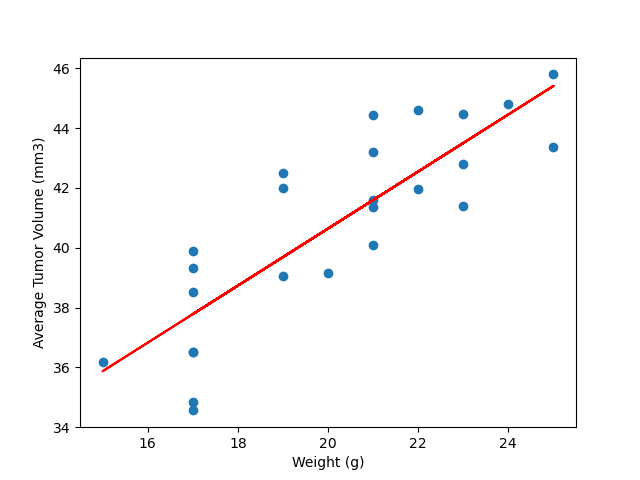

In [325]:
# Calculate the correlation coefficient 
correlation = st.pearsonr(avg_campomulin_vol["Weight (g)"],avg_campomulin_vol["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

# linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = avg_campomulin_vol["Weight (g)"]
y_values = avg_campomulin_vol["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
